Size of data set: 5891
First 3 values in data set: [5.36 2.48 8.08]
Sum of data set: 1442.145437310004


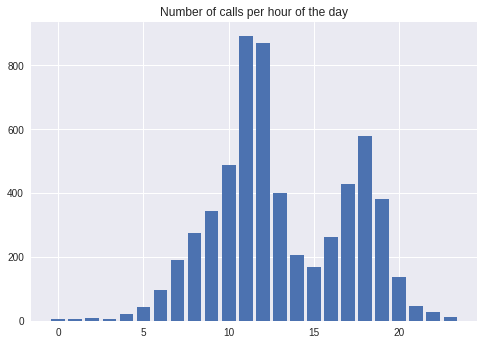

In [0]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('https://gist.githubusercontent.com/cscheffler/6a03c9473297f21b78363ec7301d19d8/raw/59999cb8c0452b2f2ed3df0b3618a91714fd8837/call_center.csv')
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

# Split the data into 24 separate series, one for each hour of the day
current_time = 0

# Make 24 empty lists, one per hour
waiting_times_per_hour = [[] for _ in range(24)]
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

# Plot the number of calls per hour
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.title('Number of calls per hour of the day')
plt.show()

Posterior α = 8.0, β = 60.5
Posterior 95% confidence interval over λ: [0.1, 0.2]
Posterior λ = 0.13
Posterior α = 6.0, β = 67.9
Posterior 95% confidence interval over λ: [0.0, 0.2]
Posterior λ = 0.09
Posterior α = 9.0, β = 70.0
Posterior 95% confidence interval over λ: [0.1, 0.2]
Posterior λ = 0.13
Posterior α = 8.0, β = 44.6
Posterior 95% confidence interval over λ: [0.1, 0.3]
Posterior λ = 0.18
Posterior α = 22.0, β = 58.8
Posterior 95% confidence interval over λ: [0.2, 0.5]
Posterior λ = 0.37
Posterior α = 43.0, β = 60.2
Posterior 95% confidence interval over λ: [0.5, 0.9]
Posterior λ = 0.71
Posterior α = 97.0, β = 59.9
Posterior 95% confidence interval over λ: [1.3, 2.0]
Posterior λ = 1.62
Posterior α = 190.0, β = 60.2
Posterior 95% confidence interval over λ: [2.7, 3.6]
Posterior λ = 3.16
Posterior α = 275.0, β = 60.5
Posterior 95% confidence interval over λ: [4.0, 5.1]
Posterior λ = 4.55
Posterior α = 345.0, β = 60.1
Posterior 95% confidence interval over λ: [5.2, 6.4]
Posterior 

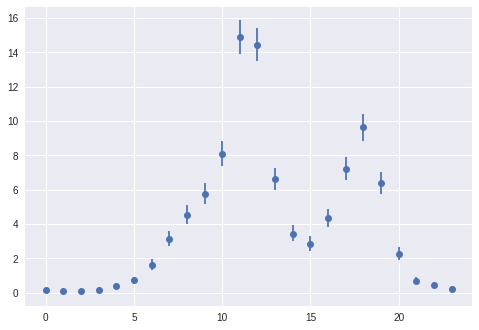

In [0]:
prior_alpha = 1
prior_beta = 0.25

hour_index = range(24)

lambdas = []
upper_bounds = []
lower_bounds = []
for i in range(len(hour_index)):

  # Computing the parameters of the posterior gamma distribution for each hour — using the table on Wikipedia and a gamma distriution with parameters α=1 and β=0.25 as  prior
  waiting_times_hour = waiting_times_per_hour[hour_index[i]]
  posterior_alpha = prior_alpha + len(waiting_times_hour)
  posterior_beta = prior_beta + sum(waiting_times_hour)
  print('Posterior α = %.1f, β = %.1f' % (posterior_alpha, posterior_beta))

  # Computing a 95% posterior confidence interval over the number of calls per minute (the call rate λ ) for each hour of the day
  posterior = stats.gamma(a=posterior_alpha, scale=1/posterior_beta)
  confidence_95 = (posterior.ppf(0.025), posterior.ppf(0.975))
  print('Posterior 95%% confidence interval over λ: [%.1f, %.1f]' % confidence_95)

  # Computing the posterior mean of λ for each hour of the day.
  lambda_ = posterior.mean()
  print('Posterior λ = %.2f' %lambda_)

  upper_bound = [posterior.ppf(0.975) - lambda_]
  lower_bound = [lambda_ - posterior.ppf(0.025)]
  
  lambdas.append(lambda_)
  upper_bounds.append(upper_bound)
  lower_bounds.append(lower_bound)

plt.errorbar(hour_index, lambdas, yerr=[lower_bounds,upper_bounds],fmt='o')
plt.show()


From the above plot we can see that during the early hours of the morning from 1am we can expect very few calls with great certainity until 5am. As it aspproches 6am we would like to begin staffing the call canter with more agents as the number of calls starts increasing. From 6 am until 8pm, there is a fluctuating amount of calls, with the most amount of calls being received between 11am and 12 noon. During these hours we can see that the call volunme increases with the average waiting time of the call increasing to 14.86 - 14.44 minutes on average being the waiting time. This waiting time fluctuates greatly and can vary depending on the number of calls received. This goes to show that the maximum staffing should occur during these hours. After 8pm, there is a very low rate of calls mimicing the eaerly morning, with the average call wait time being much less (in the range of 0.69 to 0.24 minutes), hence illustrating that very little staffing is required during these hours. 